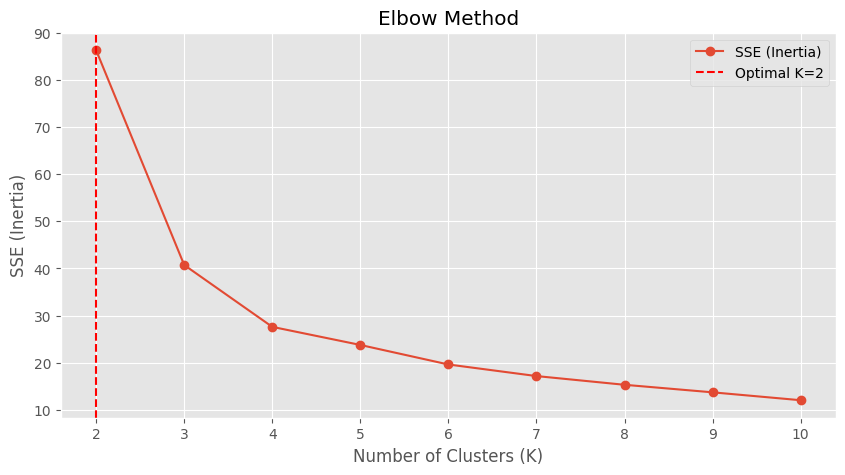

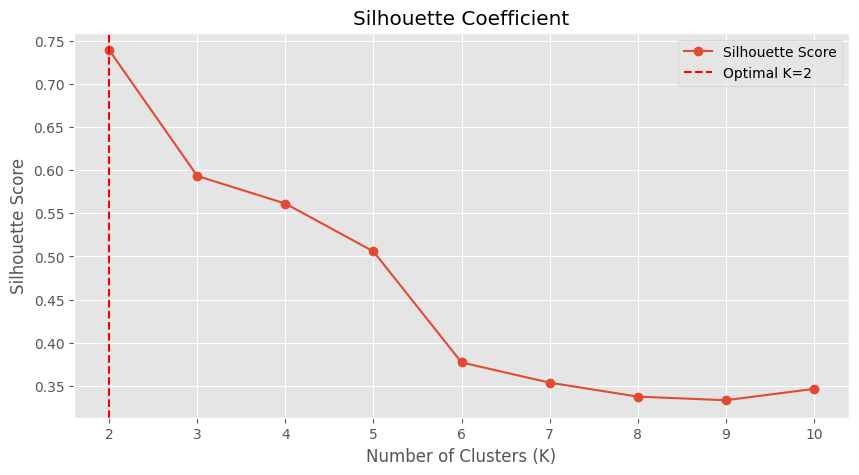

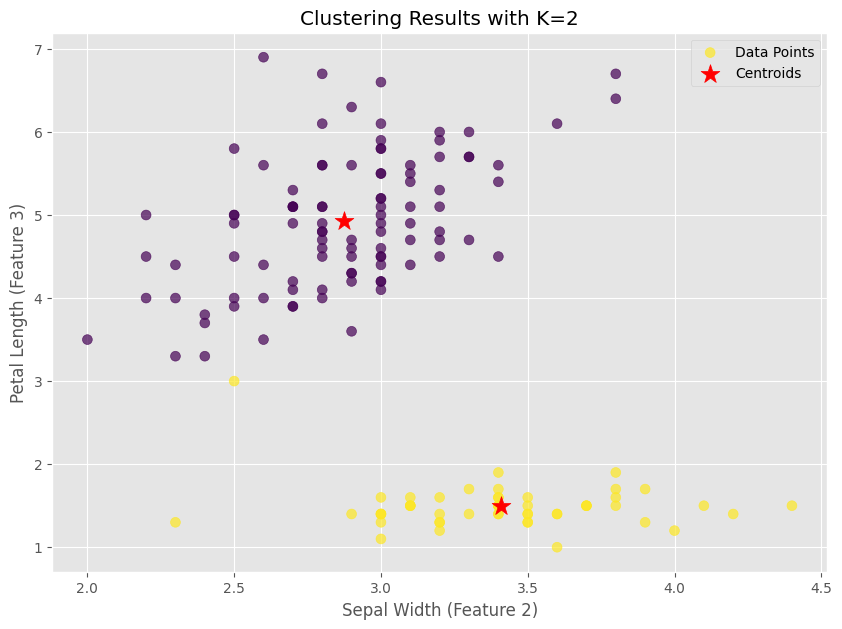

(2,
 [86.31064765300054,
  40.73707409220729,
  27.610401971326176,
  23.77066121145776,
  19.62605102470054,
  17.167753863519994,
  15.31771134533388,
  13.716718974546337,
  12.043107591364306],
 [0.7392862954615389,
  0.5933477102522363,
  0.5613370943285367,
  0.5057934048484143,
  0.37703881729133365,
  0.3535545222804318,
  0.33737507922227833,
  0.3331674287266355,
  0.34632325735288516])

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

# Load dataset Iris
iris = load_iris()
data = iris.data[:, 1:3]  # Gunakan fitur kedua (Sepal Width) dan ketiga (Petal Length)

# Evaluasi jumlah K menggunakan Elbow Method
sse = []  # Sum of Squared Errors (Inertia)
silhouette_scores = []

k_values = range(2, 11)  # Rentang K (2 sampai 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Menentukan nilai K optimal (Elbow Method)
optimal_k = k_values[np.argmin(np.gradient(sse))]

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, marker='o', linestyle='-', label='SSE (Inertia)')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', label='Silhouette Score')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.legend()
plt.show()

# Clustering dengan K optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data)
labels = kmeans_optimal.labels_
centroids = kmeans_optimal.cluster_centers_

# Scatterplot hasil clustering
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*', label='Centroids')
plt.title(f'Clustering Results with K={optimal_k}')
plt.xlabel('Sepal Width (Feature 2)')
plt.ylabel('Petal Length (Feature 3)')
plt.legend()
plt.show()

(optimal_k, sse, silhouette_scores)



#Hasil Analisis
#Jumlah Cluster Optimal (Elbow Method): Dari grafik Elbow Method, jumlah cluster optimal adalah K=2.

#Evaluasi Clustering:

#Inertia (SSE): Nilai SSE menurun saat jumlah cluster bertambah, menunjukkan peningkatan kecocokan. Untuk K=2, inertia adalah sekitar 86.31.
#Silhouette Coefficient: Nilai silhouette coefficient tertinggi adalah 0.739 untuk K=2, menunjukkan cluster yang lebih terdefinisi.
#Scatterplot Hasil Clustering: Plot terakhir menunjukkan hasil clustering dengan K=2, di mana titik data diberi warna sesuai dengan cluster dan centroid ditandai dengan tanda bintang merah.
